```
43578	IRIDIUM 159 [+]	0.06052	0.008	6.084	2021-01-13 22:42:16.825
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import re
import datetime

Let's identify the incident from SOCRATES first

In [2]:
path = '../../data/socrates/'
files = [ (match[0],match[1]) for f in listdir(path) if isfile(join(path, f))  if (match:=re.search('^socrates_([0-9]{14})\.csv(\.gz)?$', f))]
files

# Build single dataset
odf = pd.DataFrame()
for file,date in files:
    tmp_df = pd.read_csv(path + file)
    odf = pd.concat([odf,tmp_df])

In [6]:
socrates = odf.copy()
socrates = socrates.sort_values(by="tca_time", ascending=False)
socrates = socrates[socrates.max_prob != 1]
socrates = socrates[socrates.rel_velo_kms > 0.2]
socrates = socrates[((socrates.sat1_norad == 43578) | (socrates.sat2_norad == 43578))]
socrates['tca_time'] = socrates['tca_time'].astype('datetime64[ns]')
socrates = socrates[(socrates.tca_time > "2021-01-11") & (socrates.tca_time < "2021-01-15")]
socrates.sort_values(by="max_prob", ascending=False).head(10)

,sat1_norad,sat1_name,sat1_days_epoch,max_prob,dil_thr_km,min_rng_km,rel_velo_kms,sat2_norad,sat2_name,sat2_days_epoch,start_time,tca_time,stop_time,extract_sort,extract_date
1000,10820,OPS 6182 (DMSP 5D-1 F3) [-],2.420,0.060520,0.002,0.008,6.084,43578,IRIDIUM 159 [+],2.142,2021 Jan 13 22:42:16.003,2021-01-13 22:42:16.825,2021 Jan 13 22:42:17.647,MINRANGE,2021-01-12 08:30:04.358999
0,10820,OPS 6182 (DMSP 5D-1 F3) [-],2.420,0.060520,0.002,0.008,6.084,43578,IRIDIUM 159 [+],2.142,2021 Jan 13 22:42:16.003,2021-01-13 22:42:16.825,2021 Jan 13 22:42:17.647,MAXPROB,2021-01-12 08:30:04.358999
15,10820,OPS 6182 (DMSP 5D-1 F3) [-],1.374,0.001051,0.016,0.062,6.084,43578,IRIDIUM 159 [+],1.096,2021 Jan 13 22:42:15.986,2021-01-13 22:42:16.808,2021 Jan 13 22:42:17.630,MAXPROB,2021-01-13 08:30:04.281474
1008,10820,OPS 6182 (DMSP 5D-1 F3) [-],1.374,0.001051,0.016,0.062,6.084,43578,IRIDIUM 159 [+],1.096,2021 Jan 13 22:42:15.986,2021-01-13 22:42:16.808,2021 Jan 13 22:42:17.630,MINRANGE,2021-01-13 08:30:04.281474
1011,10820,OPS 6182 (DMSP 5D-1 F3) [-],3.396,0.000733,0.019,0.074,6.084,43578,IRIDIUM 159 [+],3.468,2021 Jan 13 22:42:16.019,2021-01-13 22:42:16.841,2021 Jan 13 22:42:17.663,MINRANGE,2021-01-11 08:30:04.612597
20,10820,OPS 6182 (DMSP 5D-1 F3) [-],3.396,0.000733,0.019,0.074,6.084,43578,IRIDIUM 159 [+],3.468,2021 Jan 13 22:42:16.019,2021-01-13 22:42:16.841,2021 Jan 13 22:42:17.663,MAXPROB,2021-01-11 08:30:04.612597
48,10820,OPS 6182 (DMSP 5D-1 F3) [-],3.117,0.000269,0.031,0.123,6.084,43578,IRIDIUM 159 [+],3.259,2021 Jan 13 22:42:16.016,2021-01-13 22:42:16.837,2021 Jan 13 22:42:17.659,MAXPROB,2021-01-11 20:30:04.068166
1023,10820,OPS 6182 (DMSP 5D-1 F3) [-],3.117,0.000269,0.031,0.123,6.084,43578,IRIDIUM 159 [+],3.259,2021 Jan 13 22:42:16.016,2021-01-13 22:42:16.837,2021 Jan 13 22:42:17.659,MINRANGE,2021-01-11 20:30:04.068166
48,10820,OPS 6182 (DMSP 5D-1 F3) [-],1.792,0.000257,0.032,0.126,6.084,43578,IRIDIUM 159 [+],2.003,2021 Jan 13 22:42:16.005,2021-01-13 22:42:16.827,2021 Jan 13 22:42:17.648,MAXPROB,2021-01-12 20:30:05.333561
1034,10820,OPS 6182 (DMSP 5D-1 F3) [-],1.792,0.000257,0.032,0.126,6.084,43578,IRIDIUM 159 [+],2.003,2021 Jan 13 22:42:16.005,2021-01-13 22:42:16.827,2021 Jan 13 22:42:17.648,MINRANGE,2021-01-12 20:30:05.333561


Looks like we got something, let's extract all SOCRATES entries for this combination: 
* IRIDIUM 159 [+]
* OPS 6182 (DMSP 5D-1 F3) [-]	
* TCA: 2021 Jan 13

In [13]:
socrates = odf.copy()
socrates = socrates[(socrates.sat1_norad == 10820) & (socrates.sat2_norad == 43578)]
socrates['tca_time'] = socrates['tca_time'].astype('datetime64[ns]')
socrates['extract_date'] = socrates['extract_date'].astype('datetime64[ns]')
socrates = socrates.sort_values(by="extract_date")
socrates = socrates.drop_duplicates(subset=["extract_date"])
socrates['max_prob'] = socrates['max_prob'] * 100
socrates

,sat1_norad,sat1_name,sat1_days_epoch,max_prob,dil_thr_km,min_rng_km,rel_velo_kms,sat2_norad,sat2_name,sat2_days_epoch,start_time,tca_time,stop_time,extract_sort,extract_date
1799,10820,OPS 6182 (DMSP 5D-1 F3) [-],5.417,0.000880,0.174,0.680,6.084,43578,IRIDIUM 159 [+],5.143,2021 Jan 13 22:42:16.030,2021-01-13 22:42:16.844,2021 Jan 13 22:42:17.658,MINRANGE,2021-01-09 08:30:04.688369
1285,10820,OPS 6182 (DMSP 5D-1 F3) [-],4.790,0.002568,0.102,0.398,6.084,43578,IRIDIUM 159 [+],5.143,2021 Jan 13 22:42:16.047,2021-01-13 22:42:16.866,2021 Jan 13 22:42:17.685,MINRANGE,2021-01-09 20:30:04.113309
1083,10820,OPS 6182 (DMSP 5D-1 F3) [-],4.790,0.010940,0.049,0.193,6.084,43578,IRIDIUM 159 [+],4.096,2021 Jan 13 22:42:16.030,2021-01-13 22:42:16.851,2021 Jan 13 22:42:17.673,MINRANGE,2021-01-10 08:30:04.685229
1098,10820,OPS 6182 (DMSP 5D-1 F3) [-],4.163,0.008206,0.057,0.223,6.084,43578,IRIDIUM 159 [+],4.096,2021 Jan 13 22:42:16.029,2021-01-13 22:42:16.850,2021 Jan 13 22:42:17.671,MINRANGE,2021-01-10 20:30:04.042440
1011,10820,OPS 6182 (DMSP 5D-1 F3) [-],3.396,0.073340,0.019,0.074,6.084,43578,IRIDIUM 159 [+],3.468,2021 Jan 13 22:42:16.019,2021-01-13 22:42:16.841,2021 Jan 13 22:42:17.663,MINRANGE,2021-01-11 08:30:04.612597
48,10820,OPS 6182 (DMSP 5D-1 F3) [-],3.117,0.026950,0.031,0.123,6.084,43578,IRIDIUM 159 [+],3.259,2021 Jan 13 22:42:16.016,2021-01-13 22:42:16.837,2021 Jan 13 22:42:17.659,MAXPROB,2021-01-11 20:30:04.068166
0,10820,OPS 6182 (DMSP 5D-1 F3) [-],2.420,6.052000,0.002,0.008,6.084,43578,IRIDIUM 159 [+],2.142,2021 Jan 13 22:42:16.003,2021-01-13 22:42:16.825,2021 Jan 13 22:42:17.647,MAXPROB,2021-01-12 08:30:04.358999
48,10820,OPS 6182 (DMSP 5D-1 F3) [-],1.792,0.025690,0.032,0.126,6.084,43578,IRIDIUM 159 [+],2.003,2021 Jan 13 22:42:16.005,2021-01-13 22:42:16.827,2021 Jan 13 22:42:17.648,MAXPROB,2021-01-12 20:30:05.333561
15,10820,OPS 6182 (DMSP 5D-1 F3) [-],1.374,0.105100,0.016,0.062,6.084,43578,IRIDIUM 159 [+],1.096,2021 Jan 13 22:42:15.986,2021-01-13 22:42:16.808,2021 Jan 13 22:42:17.630,MAXPROB,2021-01-13 08:30:04.281474
62,10820,OPS 6182 (DMSP 5D-1 F3) [-],0.538,0.022420,0.034,0.135,6.085,43578,IRIDIUM 159 [+],1.026,2021 Jan 13 22:42:15.982,2021-01-13 22:42:16.804,2021 Jan 13 22:42:17.625,MAXPROB,2021-01-13 20:30:04.978070


In [9]:
df = pd.read_csv("iridium159.csv") # last 365 days
df['EPOCH'] = df['EPOCH'].astype('datetime64[ns]')
df = df.drop_duplicates(subset=['EPOCH'])
df = df.set_index("EPOCH")
df.columns
df = df[['OBJECT_NAME', 'OBJECT_ID', 'SEMIMAJOR_AXIS', 'INCLINATION']]

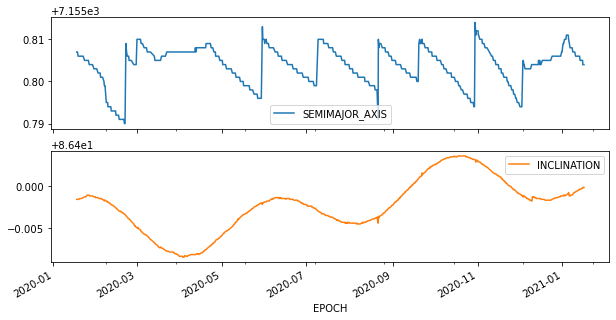

In [10]:
# lets do a quick plot on all TLEs the past 365 days
df.plot(subplots=True,figsize=(10,5));

Looks like this satellite does a lot of moving around with lots of orbit raising maneuvers as seen by the spikes in `SEMIMAJOR_AXIS`.

Narrowing down the time a bit, including a bit of Oct 2020 to see the 2 previous maneuvers. GREEN for the first extract time, RED for TCA time.

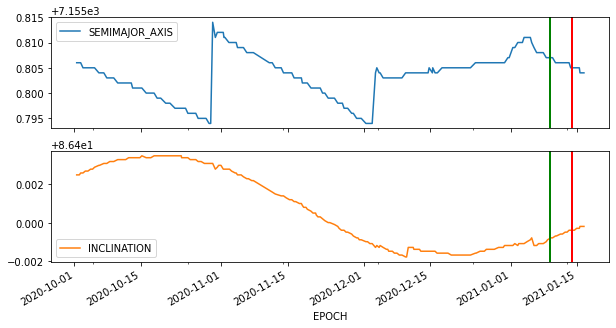

In [17]:
# lets narrow down the time range and add see if we can nail down the exact times
axes=df.loc[df.index > '2020-10-01'].plot(subplots=True,figsize=(10,5))

for a in axes:
    a.axvline(x=socrates.extract_date.min(), lw=2, c="green")
    a.axvline(x=socrates.tca_time.mean(), lw=2, c="red")

Narrowing down further around the SOCRATES dates.

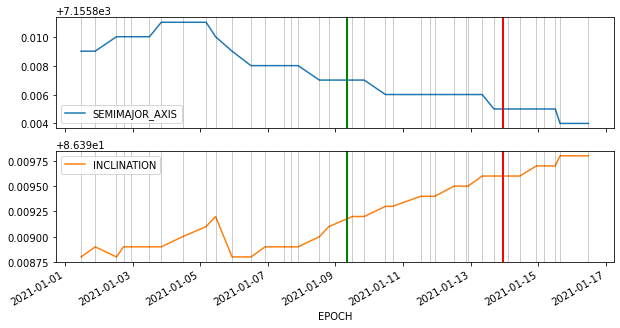

In [21]:
axes=df.loc[(df.index > '2021-01-01')].plot(subplots=True,figsize=(10,5))

for a in axes:
    for e in df.loc[(df.index > '2021-01-01')].index:
        a.axvline(x=e, lw=1, c="#00000033")
    a.axvline(x=socrates.extract_date.min(), lw=2, c="green")
    a.axvline(x=socrates.tca_time.mean(), lw=2, c="red")

Right now, it doesn't seem like the satellite maneuvered during this period to avoid the collision, but what is interesting is that there was an extended plateau between the 2 SOCRATES dates.  There has been other plateaus in the data, but for the amount of TLEs in between, this seems deliberate.  Perhaps they let the satellite stay in orbit rather than slowly decay?  Let's see how this maps with the SOCRATES probabilities.

,max_prob
extract_date,
2021-01-09 08:30:04.688369,0.000880
2021-01-09 20:30:04.113309,0.002568
2021-01-10 08:30:04.685229,0.010940
2021-01-10 20:30:04.042440,0.008206
2021-01-11 08:30:04.612597,0.073340
2021-01-11 20:30:04.068166,0.026950
2021-01-12 08:30:04.358999,6.052000
2021-01-12 20:30:05.333561,0.025690
2021-01-13 08:30:04.281474,0.105100


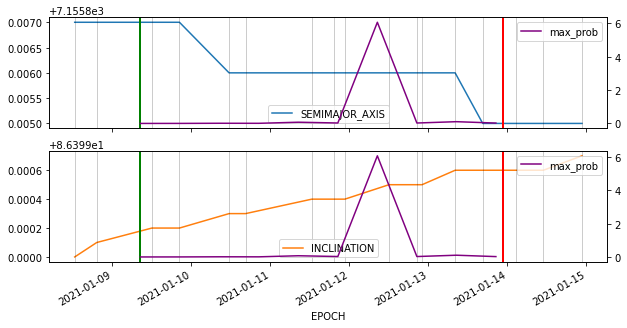

In [32]:
probs = socrates[['max_prob','extract_date']].set_index("extract_date")
probs

axes=df.loc[(df.index > '2021-01-08') & (df.index < '2021-01-15')].plot(subplots=True,figsize=(10,5), legend=True)

for a in axes:
    for e in df.loc[(df.index > '2021-01-08') & (df.index < '2021-01-15')].index:
        a.axvline(x=e, lw=1, c="#00000033")
    a2 = a.twinx()
    probs.plot(ax=a2, color="purple")
        
    a.axvline(x=socrates.extract_date.min(), lw=2, c="green")
    a.axvline(x=socrates.tca_time.mean(), lw=2, c="red")

Looks like an outlier :(

I want to see if I can make this into something convenient though